In [1]:
!pip install ultralytics

from ultralytics import YOLO
import cv2
import torch
import numpy as np
import os
from google.colab.patches import cv2_imshow
import pandas as pd
import random
import matplotlib.pyplot as plt
import yaml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.5/974.5 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Create the yaml file

In [2]:
data = {
    "train": "/content/drive/MyDrive/FaceTrackAI/data/images/train",
    "val": "/content/drive/MyDrive/FaceTrackAI/data/images/val",
    "nc": 1,
    "names": ["face"]
}

with open("data.yaml", "w") as f:
    yaml.dump(data, f, default_flow_style=False)


Mounted at /content/drive


# Model training

In [3]:
!yolo task=detect mode=train model=yolov8n.pt data=data.yaml epochs=5 batch=32 imgsz=416

100% 6.25M/6.25M [00:00<00:00, 59.6MB/s]
Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_box

In [4]:
!cp runs/detect/train/weights/best.pt /content/drive/MyDrive/FaceTrackAI/weights/yolov8n_face_best.pt


In [23]:
!cp runs/detect/train/weights/last.pt /content/drive/MyDrive/FaceTrackAI/weights/yolov8n_face_last.pt


In [7]:
!cp -r runs/detect/train* /content/drive/MyDrive/FaceTrackAI/train_logs


In [5]:
os.listdir("runs/detect/train")

['val_batch0_labels.jpg',
 'confusion_matrix.png',
 'train_batch1.jpg',
 'val_batch1_labels.jpg',
 'events.out.tfevents.1744545216.f64c9c6dbb63.1210.0',
 'F1_curve.png',
 'val_batch0_pred.jpg',
 'results.png',
 'val_batch2_labels.jpg',
 'weights',
 'R_curve.png',
 'P_curve.png',
 'train_batch2.jpg',
 'labels.jpg',
 'val_batch1_pred.jpg',
 'args.yaml',
 'confusion_matrix_normalized.png',
 'results.csv',
 'train_batch0.jpg',
 'PR_curve.png',
 'labels_correlogram.jpg',
 'val_batch2_pred.jpg']

## Plot train results

In [6]:
results_csv= pd.read_csv("runs/detect/train/results.csv")

results_csv.head()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,10743.8,1.45314,1.29799,1.15608,0.82917,0.60530,0.68089,0.39391,1.42218,1.00222,1.12769,0.000665,0.000665,0.000665
1,2,17083.1,1.34932,0.90596,1.09273,0.87123,0.66875,0.76031,0.46434,1.32420,0.80574,1.07365,0.001068,0.001068,0.001068
2,3,23267.9,1.30620,0.83286,1.07448,0.87633,0.67839,0.76472,0.47515,1.29179,0.76319,1.05847,0.001207,0.001207,0.001207
3,4,29503.1,1.26446,0.77691,1.05771,0.88710,0.70677,0.79017,0.49691,1.24076,0.68822,1.03559,0.000812,0.000812,0.000812
4,5,35701.6,1.21374,0.71024,1.03737,0.89296,0.72726,0.81340,0.52240,1.19112,0.62989,1.01486,0.000416,0.000416,0.000416


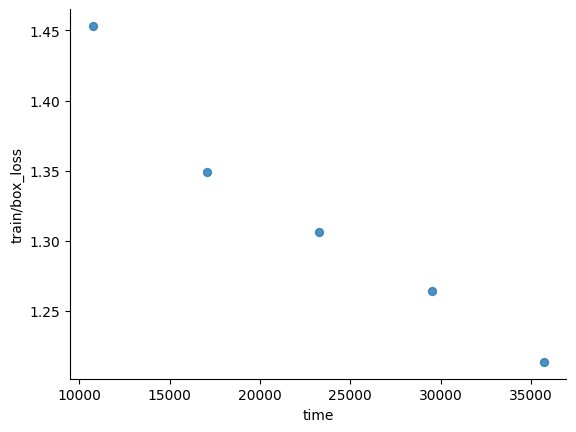

In [9]:
# @title time vs train/box_loss

from matplotlib import pyplot as plt
results_csv.plot(kind='scatter', x='time', y='train/box_loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

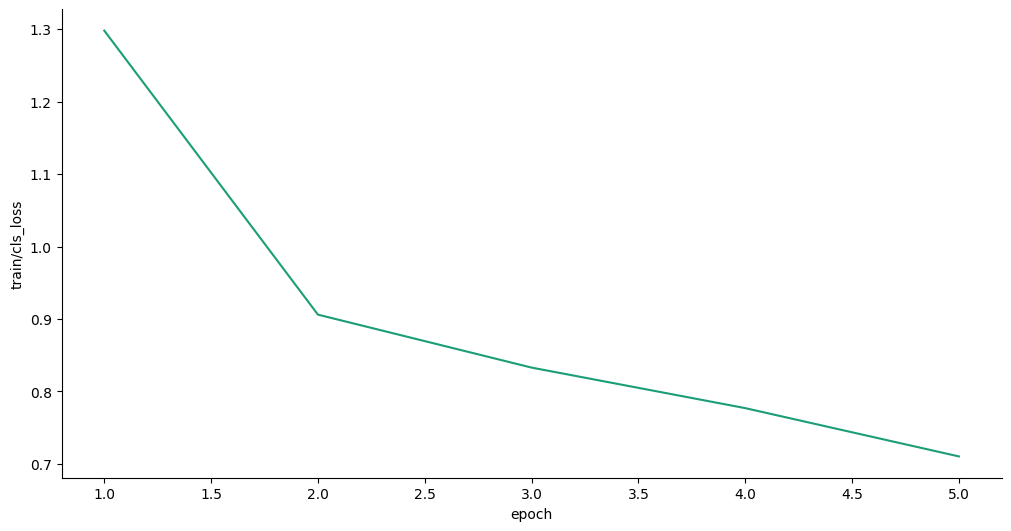

In [8]:
# @title epoch vs train/cls_loss

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['epoch']
  ys = series['train/cls_loss']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results_csv.sort_values('epoch', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('epoch')
_ = plt.ylabel('train/cls_loss')

In [10]:
results_csv.columns


Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')

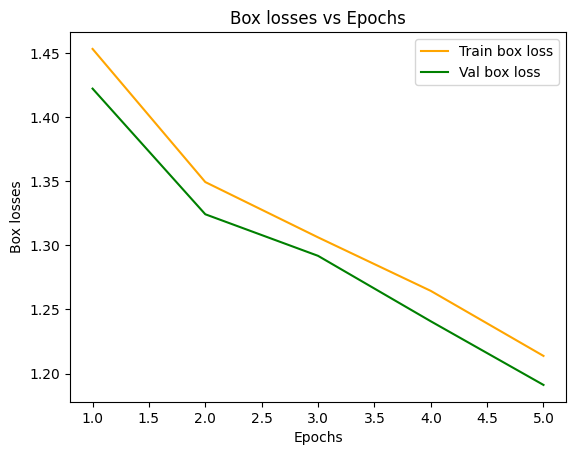

In [14]:
# plot box loss
plt.plot(range(1, 6), results_csv["train/box_loss"], color= "orange", label= "Train box loss")
plt.plot(range(1, 6), results_csv["val/box_loss"], color= "green", label= "Val box loss")
plt.xlabel("Epochs")
plt.ylabel("Box losses")
plt.title("Box losses vs Epochs")
plt.legend()

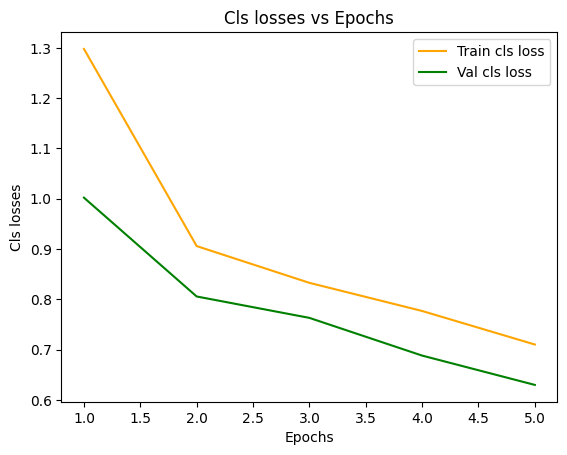

In [18]:
# plot cls loss
plt.plot(range(1, 6), results_csv["train/cls_loss"], color= "orange", label= "Train cls loss")
plt.plot(range(1, 6), results_csv["val/cls_loss"], color= "green", label= "Val cls loss")
plt.xlabel("Epochs")
plt.ylabel("Cls losses")
plt.title("Cls losses vs Epochs")
plt.legend()

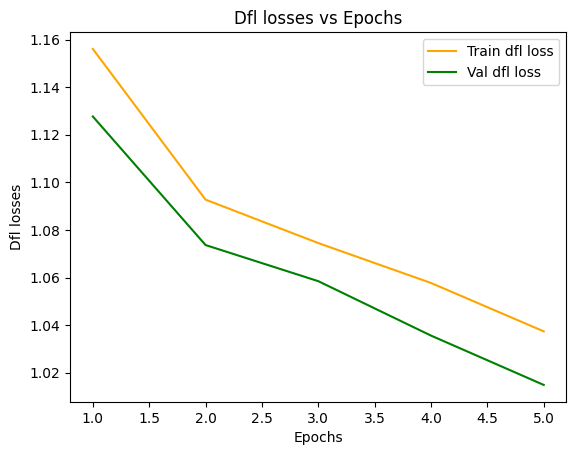

In [19]:
# plot dfl loss
plt.plot(range(1, 6), results_csv["train/dfl_loss"], color= "orange", label= "Train dfl loss")
plt.plot(range(1, 6), results_csv["val/dfl_loss"], color= "green", label= "Val dfl loss")
plt.xlabel("Epochs")
plt.ylabel("Dfl losses")
plt.title("Dfl losses vs Epochs")
plt.legend()

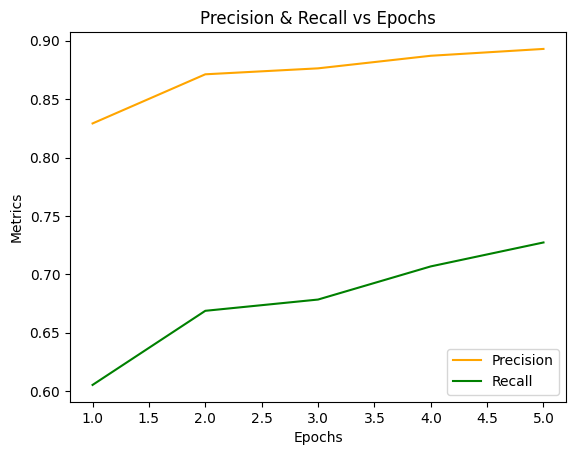

In [21]:
# plot precision and recall
plt.plot(range(1, 6), results_csv["metrics/precision(B)"], color= "orange", label= "Precision")
plt.plot(range(1, 6), results_csv["metrics/recall(B)"], color= "green", label= "Recall")
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.title("Precision & Recall vs Epochs")
plt.legend()

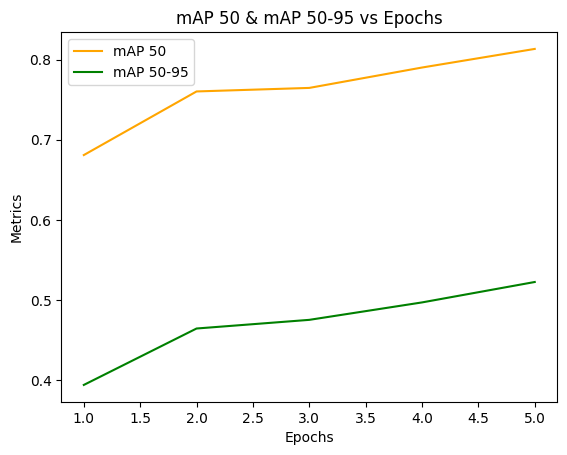

In [22]:
# plot map 50 and map 50-95
plt.plot(range(1, 6), results_csv["metrics/mAP50(B)"], color= "orange", label= "mAP 50")
plt.plot(range(1, 6), results_csv["metrics/mAP50-95(B)"], color= "green", label= "mAP 50-95")
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.title("mAP 50 & mAP 50-95 vs Epochs")
plt.legend();

# Validation

In [24]:
os.listdir("runs/detect/train/weights")

['last.pt', 'best.pt']

In [25]:
# cli
!yolo task= detect mode= val model= runs/detect/train/weights/best.pt data= data.yaml

Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/FaceTrackAI/data/labels/val.cache... 3347 images, 0 backgrounds, 0 corrupt: 100% 3347/3347 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 210/210 [07:42<00:00,  2.20s/it]
                   all       3347      10299      0.892      0.729      0.814      0.522
Speed: 1.0ms preprocess, 98.8ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [27]:
!cp -r runs/detect/val* /content/drive/MyDrive/FaceTrackAI/val_logs


## Plot validation results

In [26]:
os.listdir("runs/detect/val")


['val_batch0_labels.jpg',
 'confusion_matrix.png',
 'val_batch1_labels.jpg',
 'F1_curve.png',
 'val_batch0_pred.jpg',
 'val_batch2_labels.jpg',
 'R_curve.png',
 'P_curve.png',
 'val_batch1_pred.jpg',
 'confusion_matrix_normalized.png',
 'PR_curve.png',
 'val_batch2_pred.jpg']

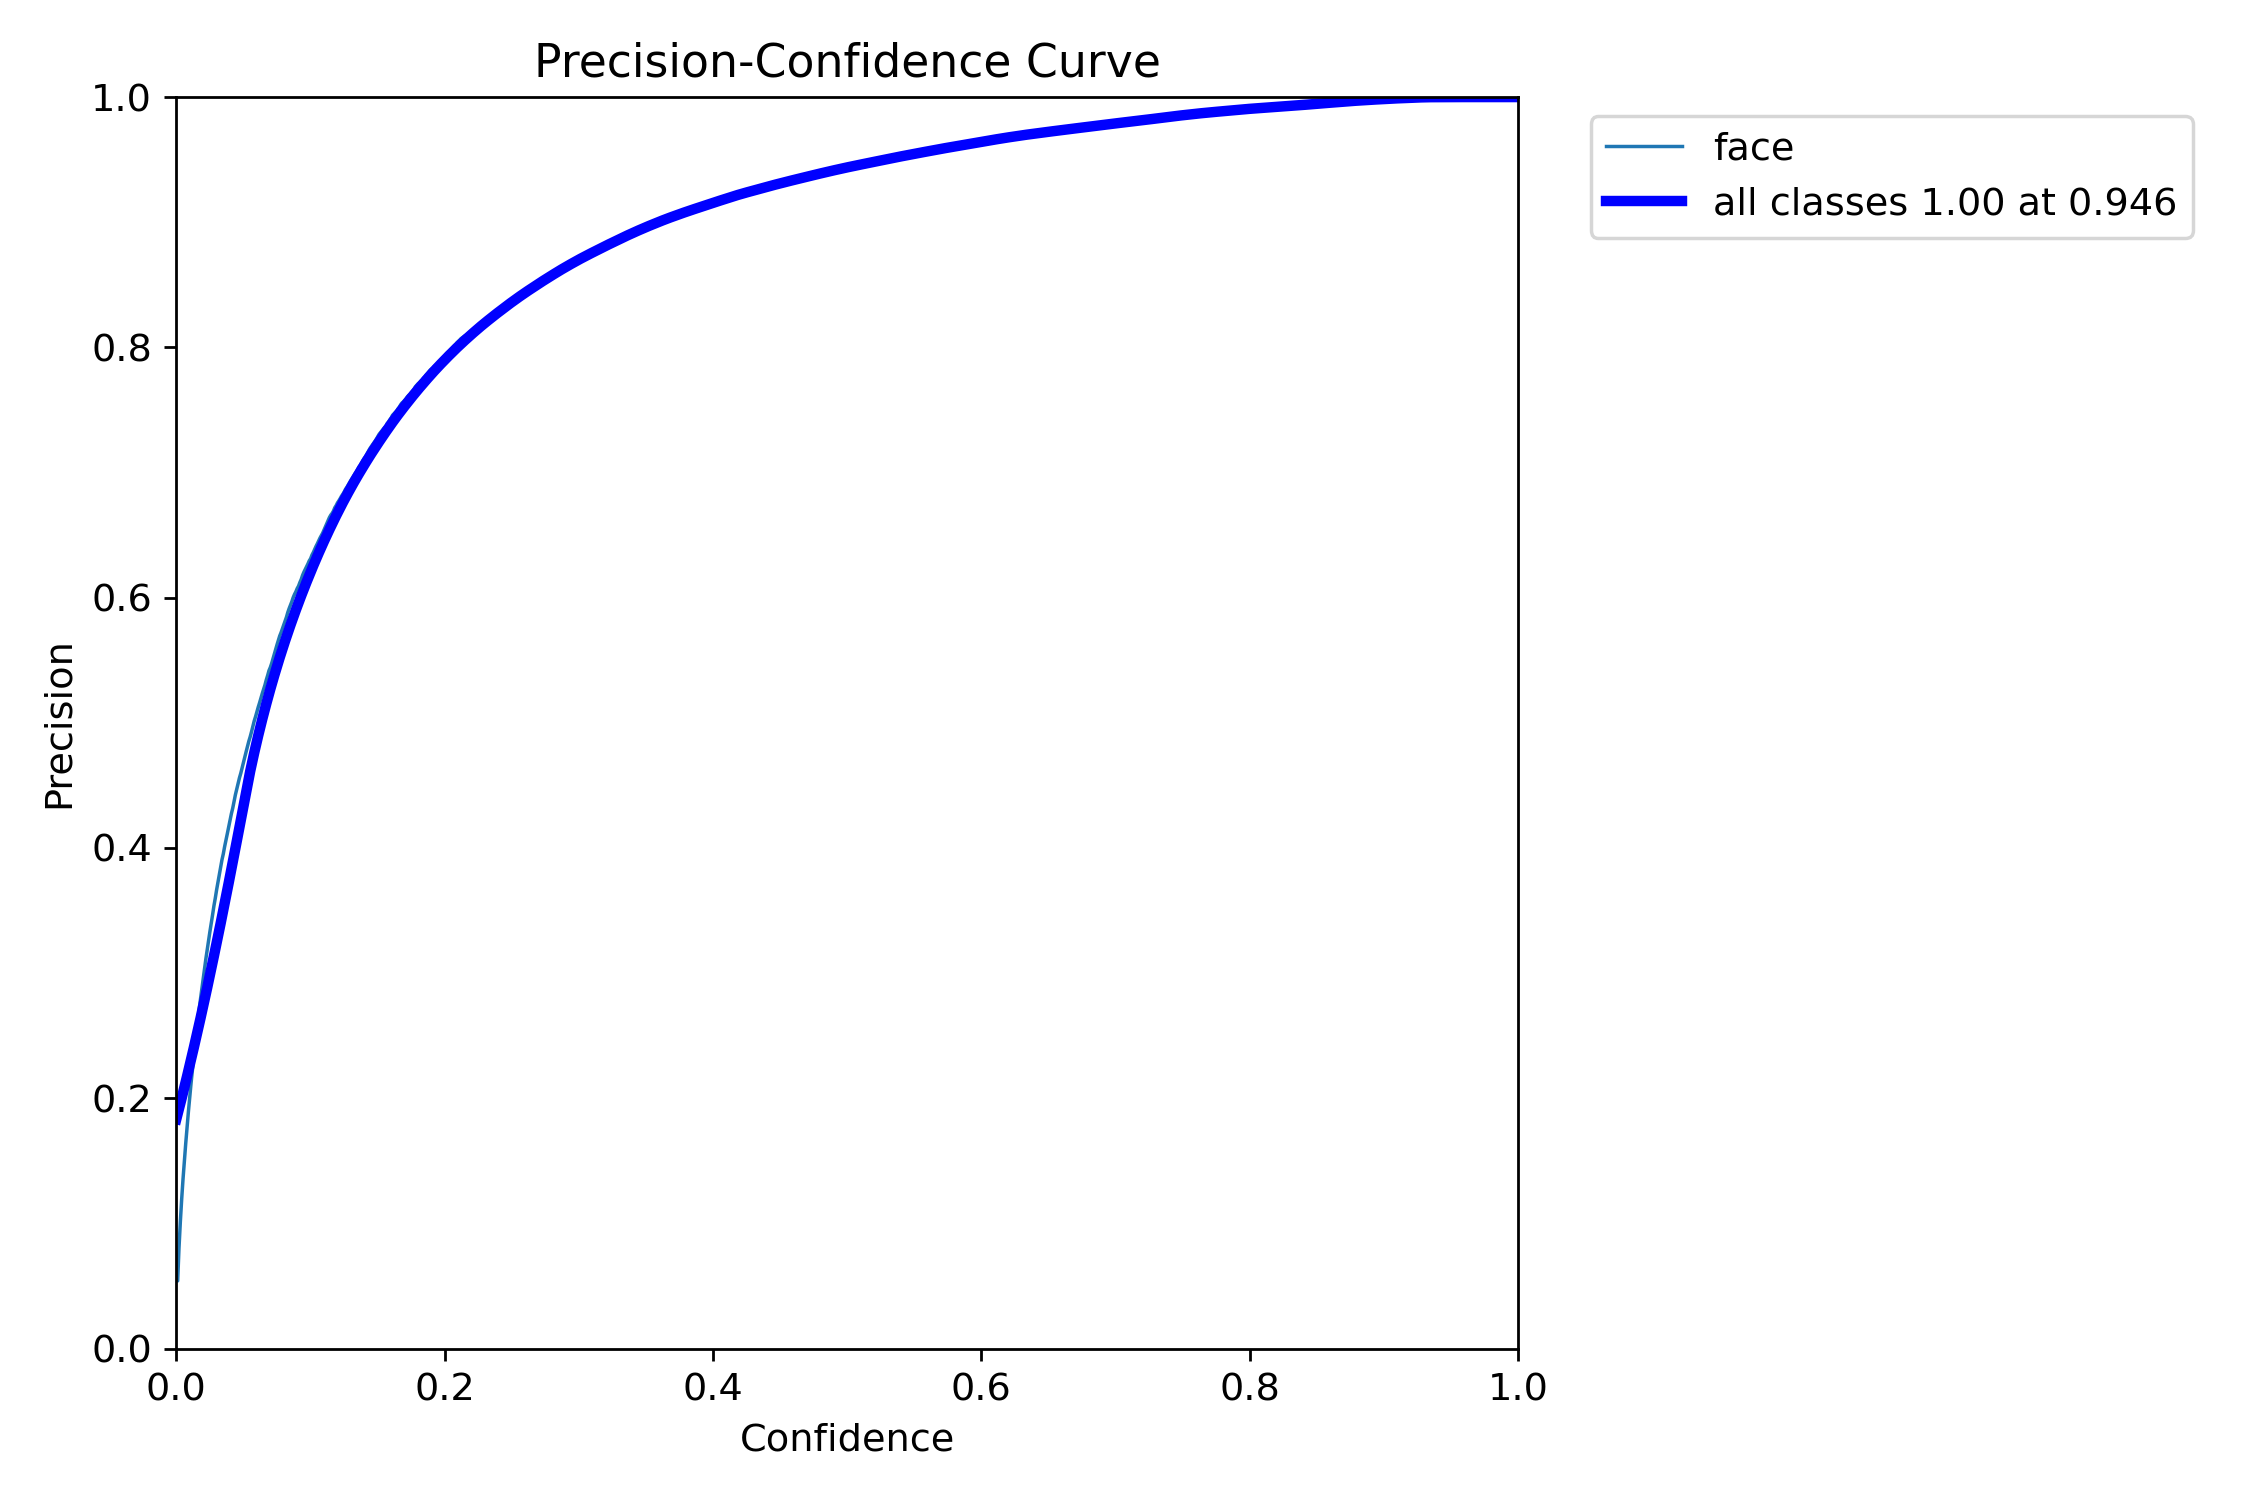

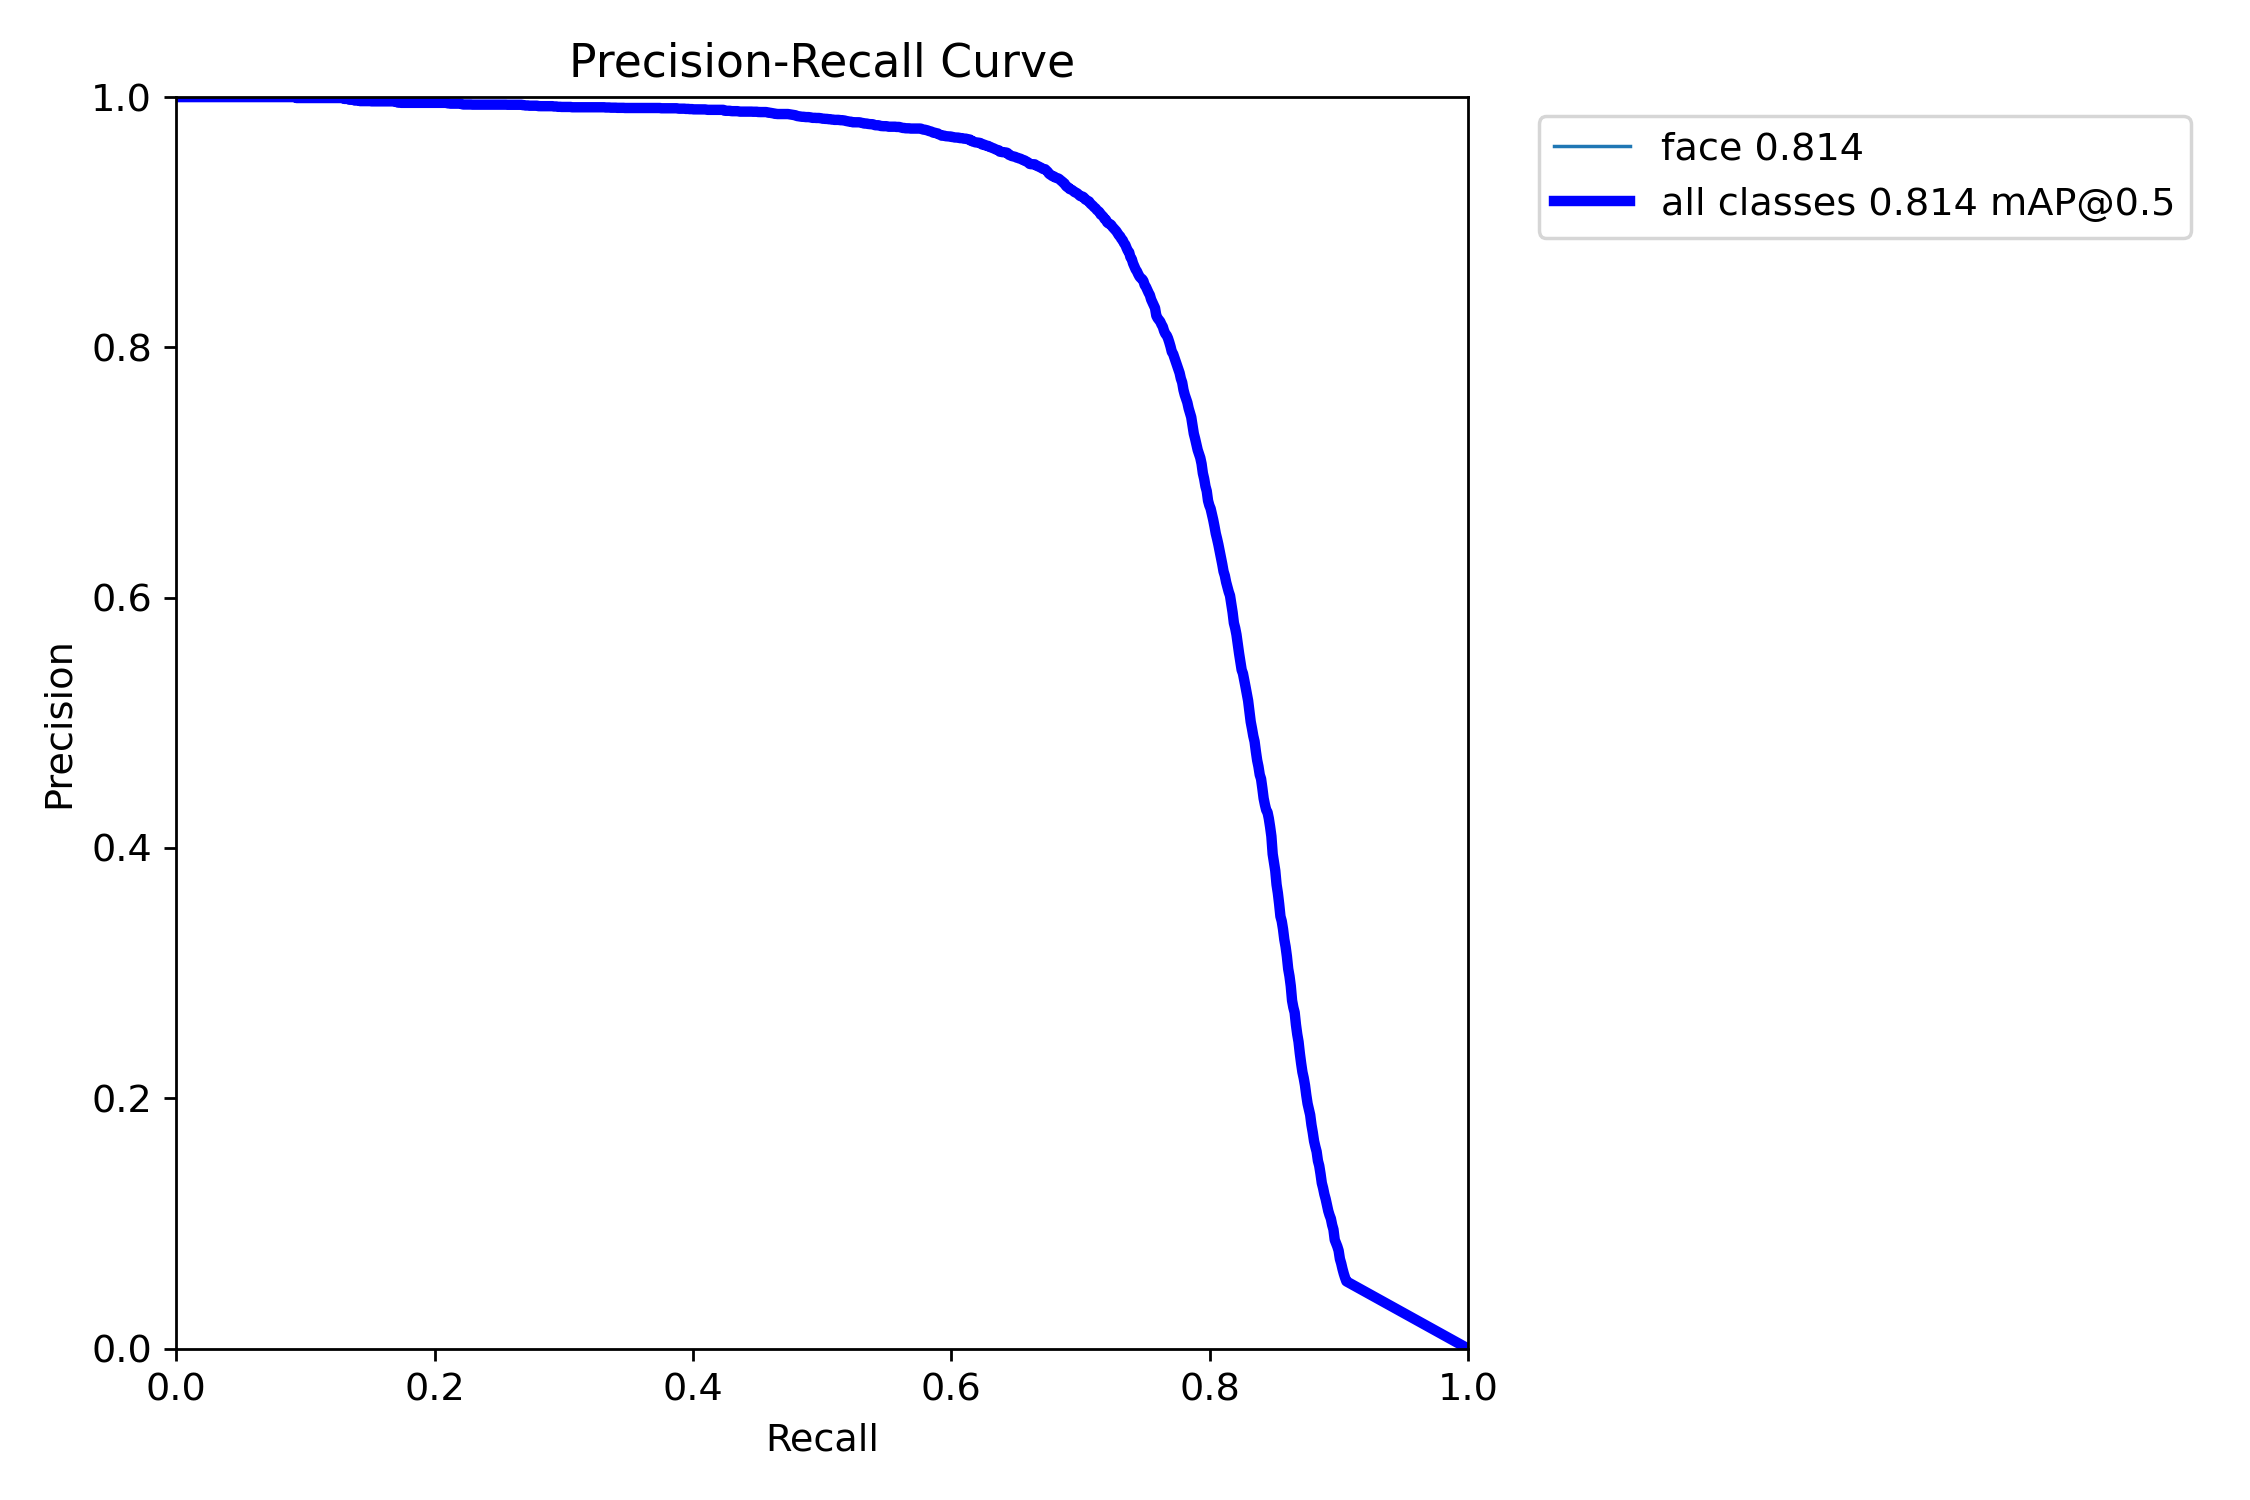

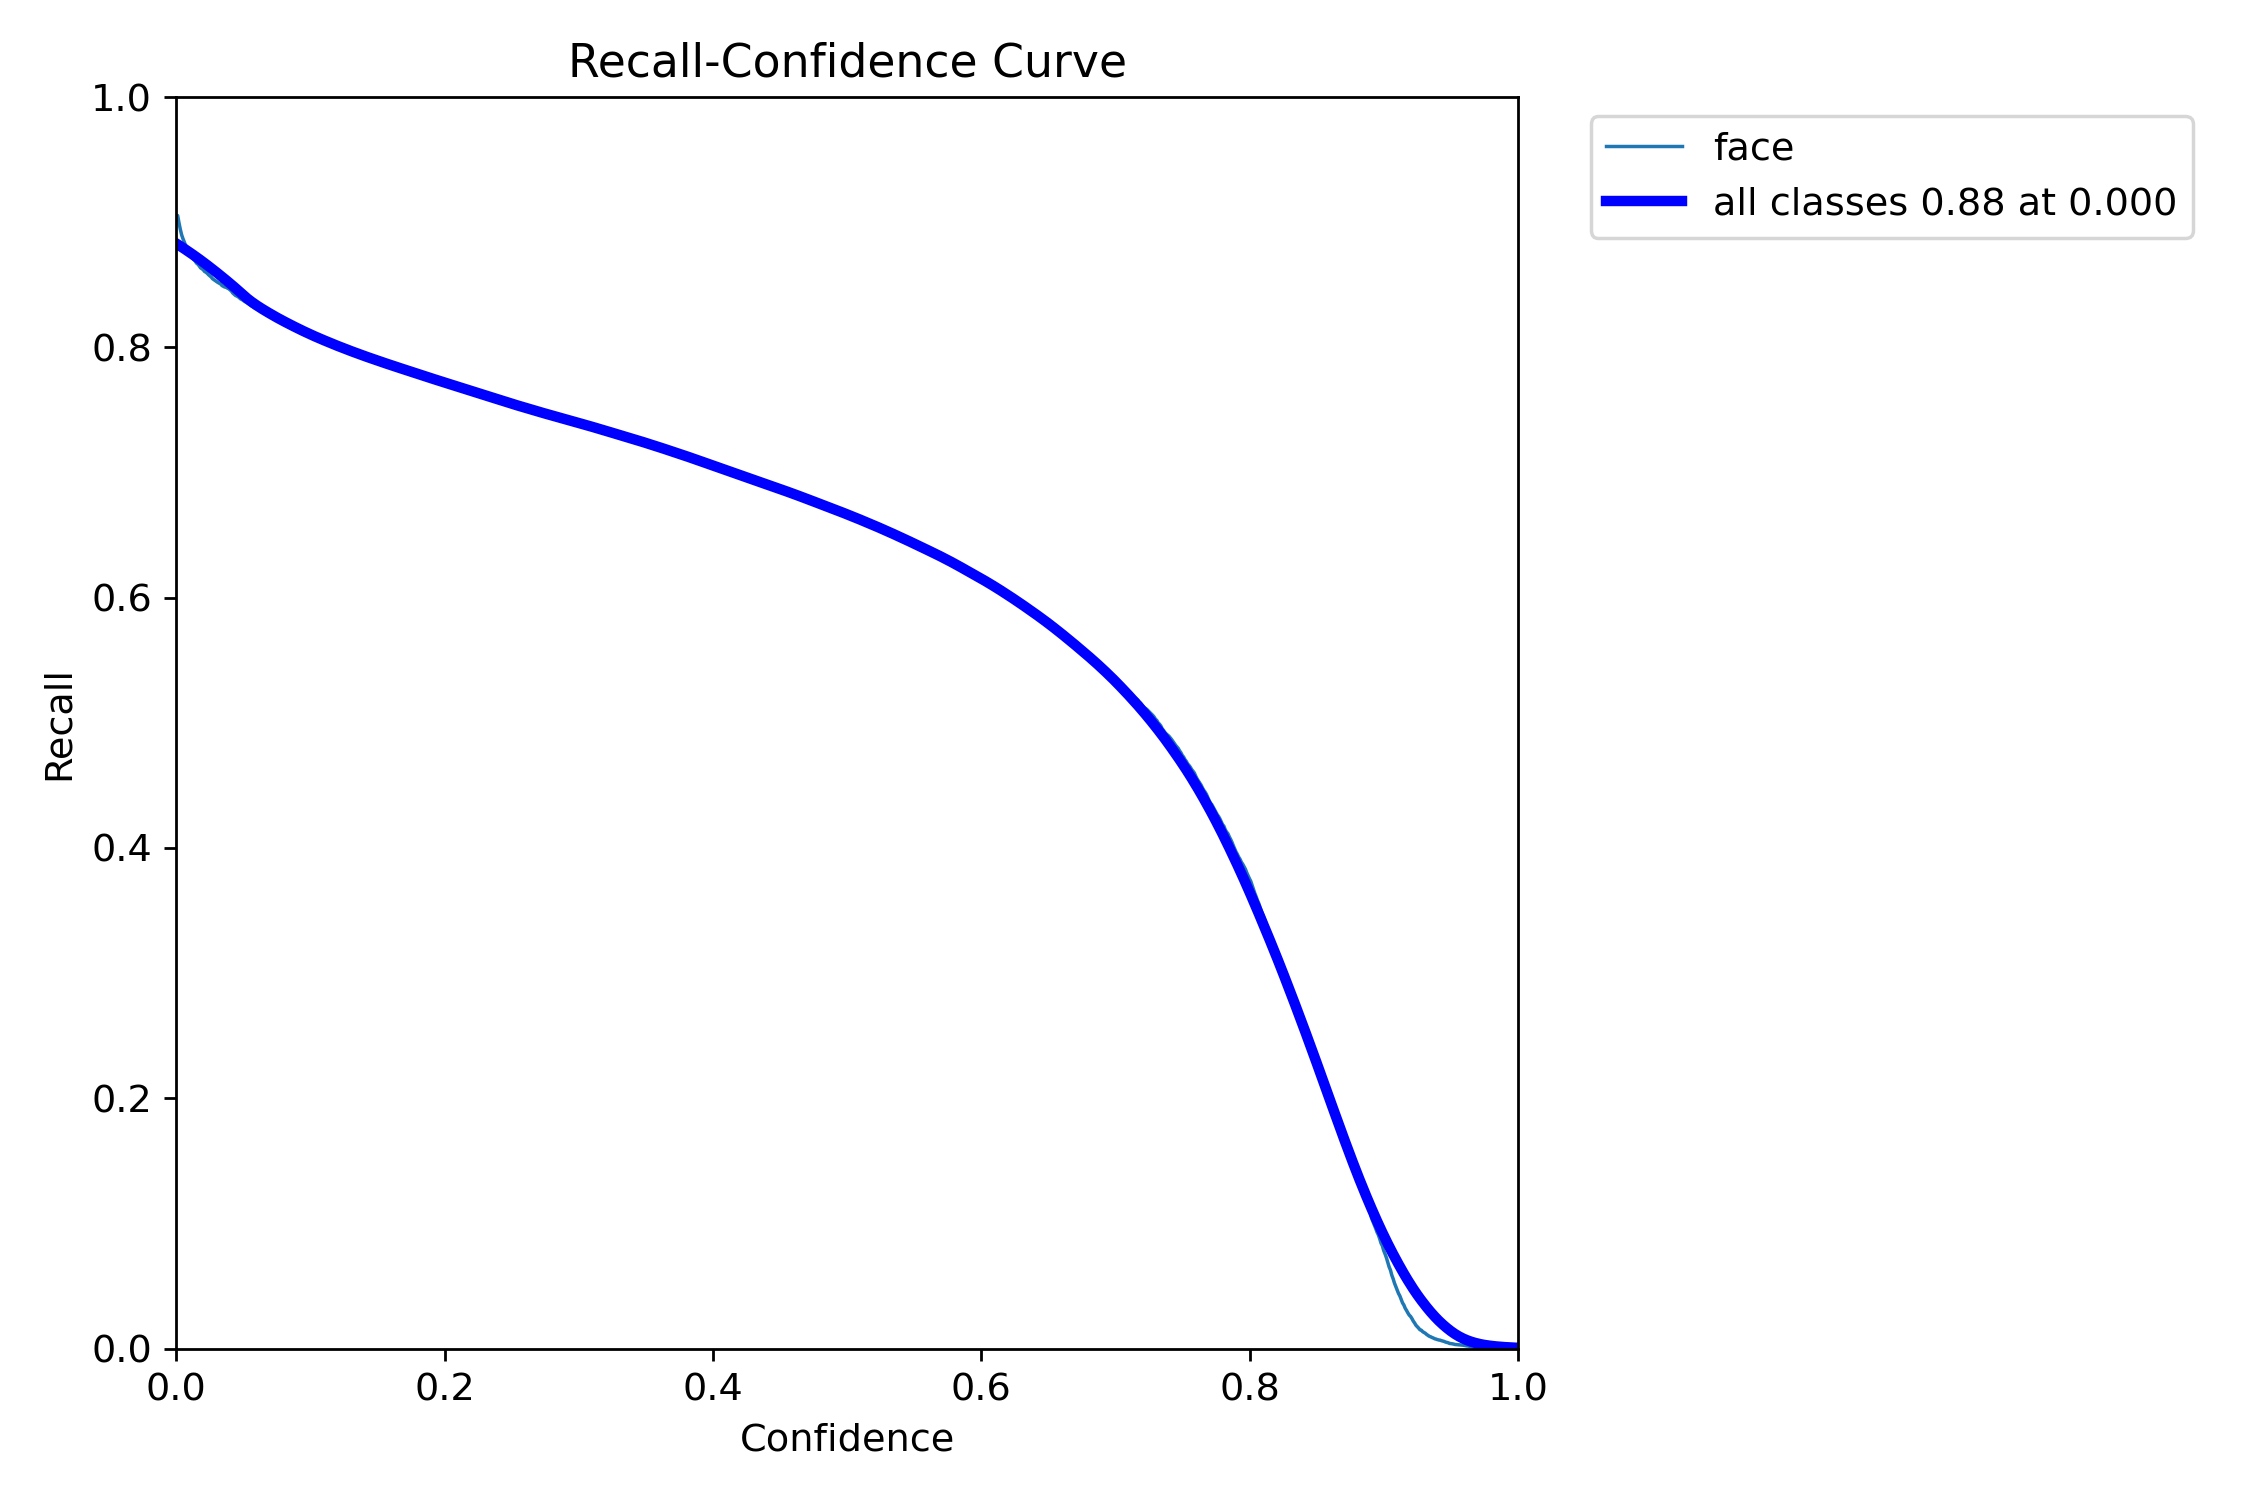

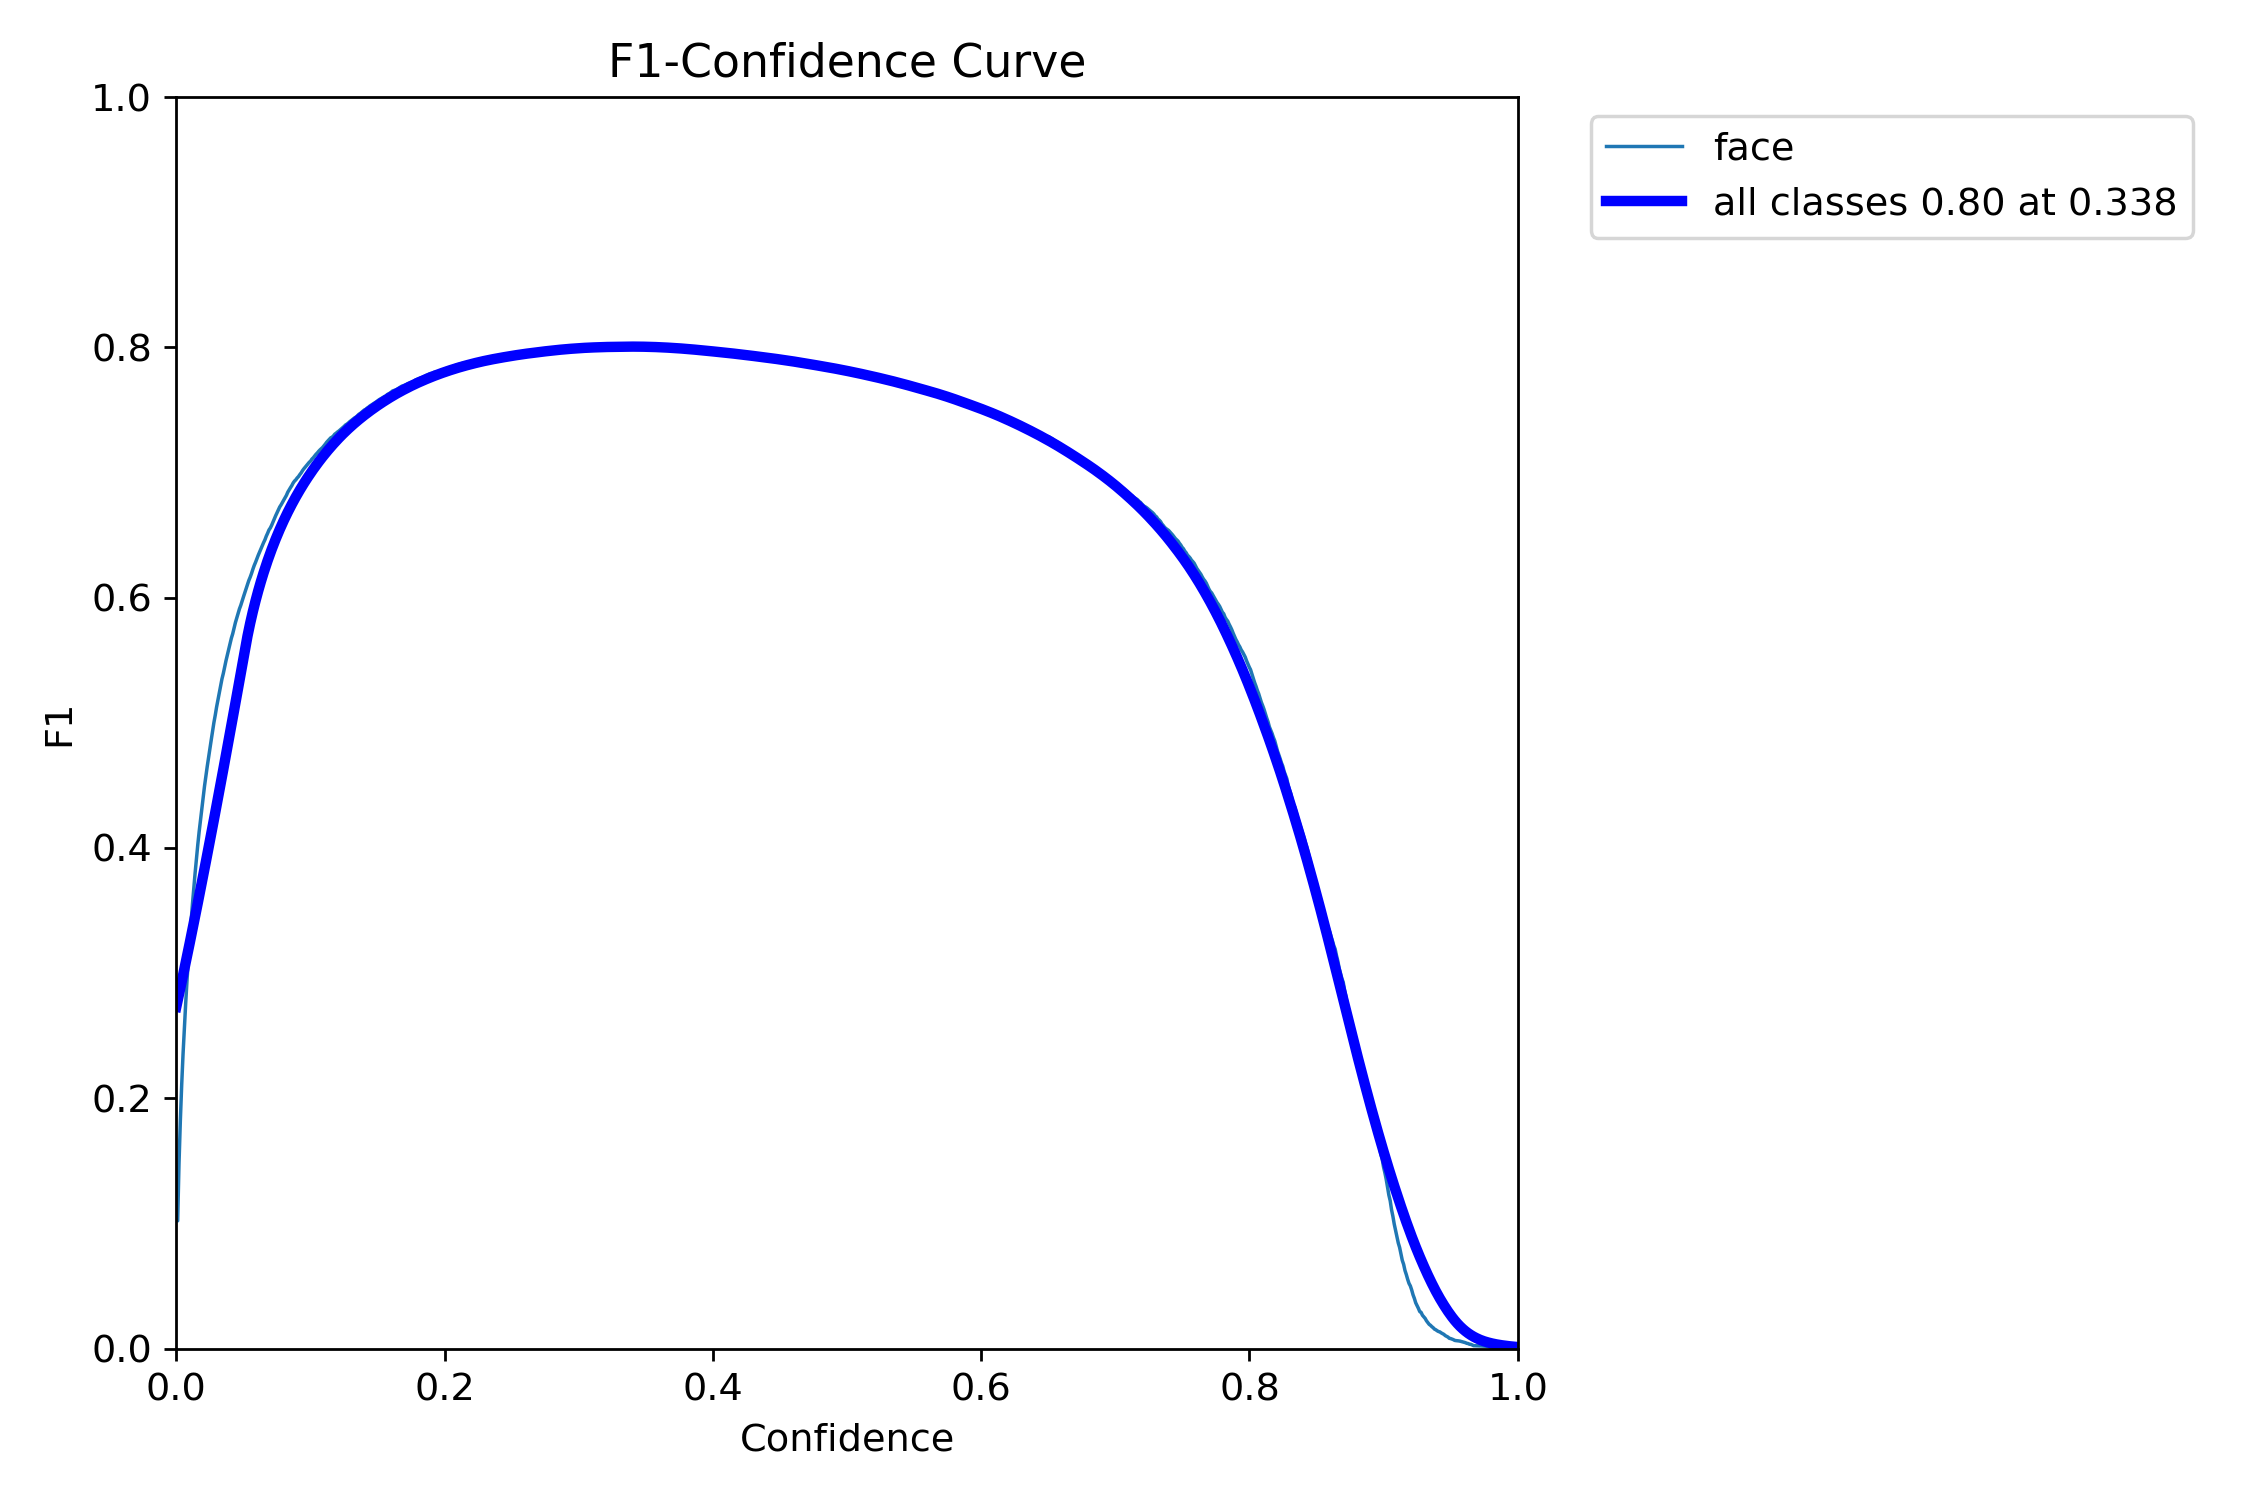

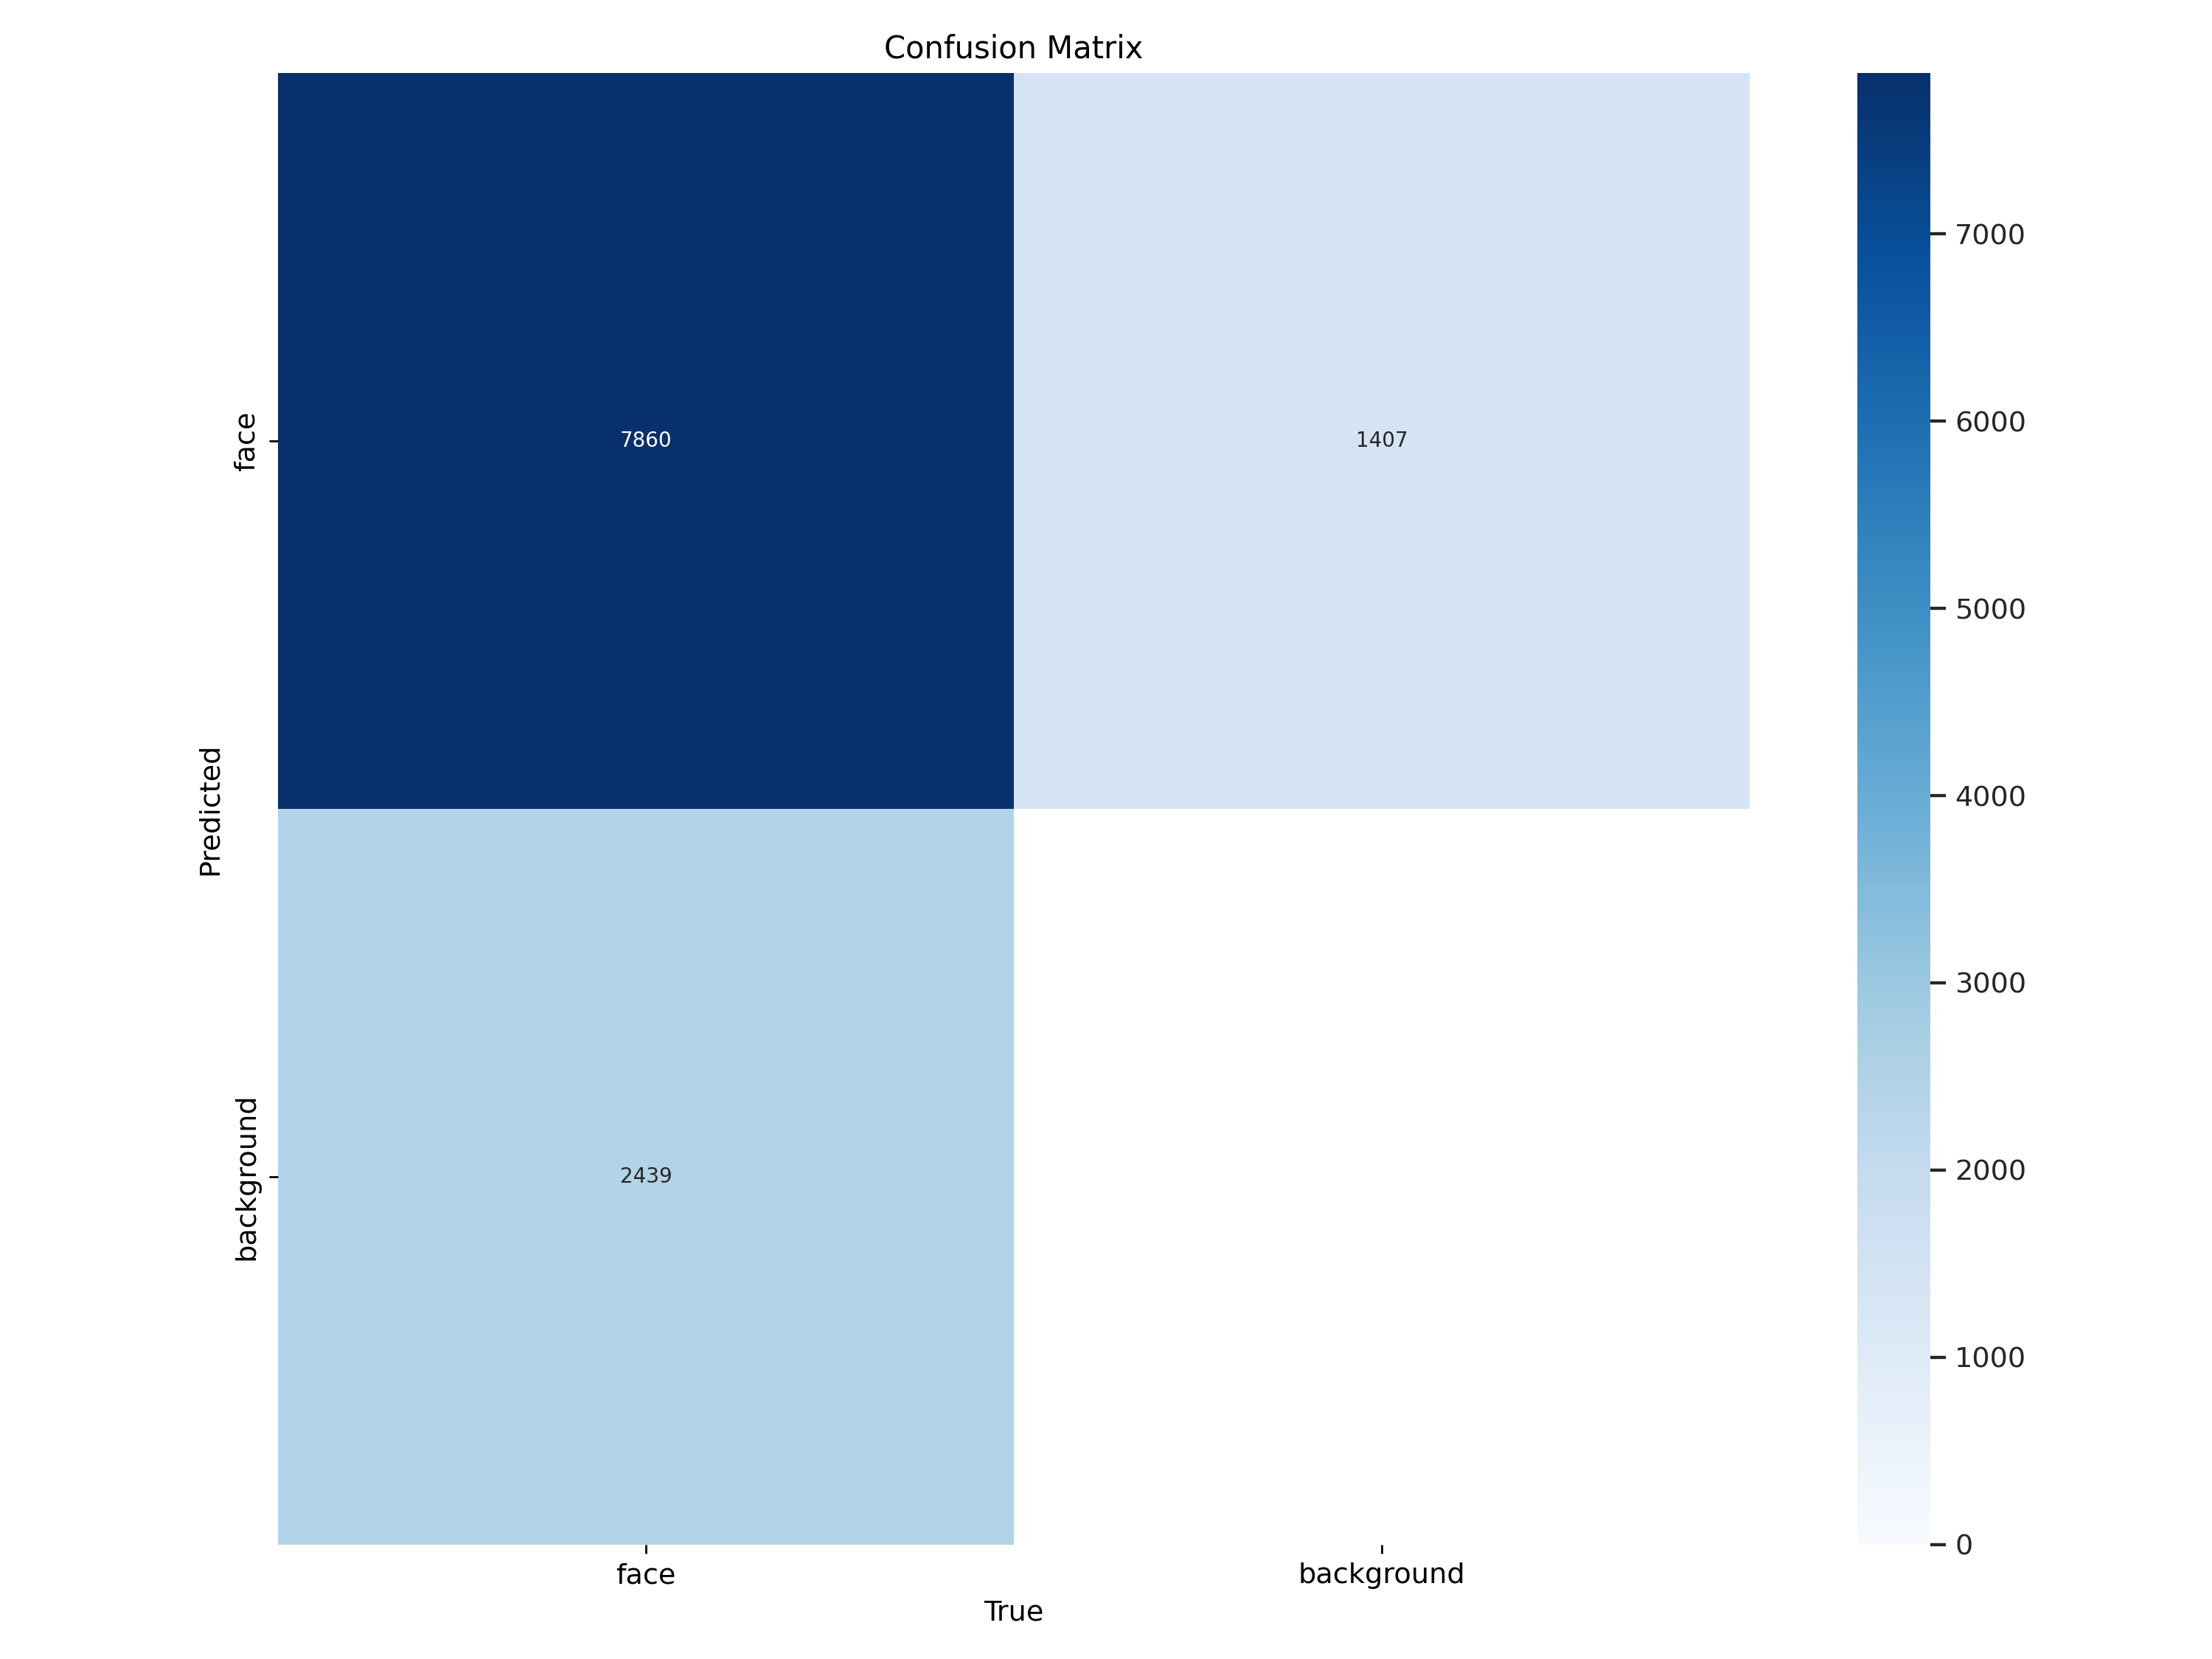

In [28]:
val_out_dir= "runs/detect/val"

# p curve, pr curve, r curve, f1 curve, confussion matrix
files= ['P_curve.png', 'PR_curve.png', 'R_curve.png', 'F1_curve.png', 'confusion_matrix.png']

for file in files:
    img= cv2.imread(os.path.join(val_out_dir, file))
    cv2_imshow(img)

# Test evaluation

In [29]:
!yolo task= detect mode= predict conf= 0.25 source= /content/drive/MyDrive/FaceTrackAI/data/images/val model= runs/detect/train/weights/best.pt

Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/3347 /content/drive/MyDrive/FaceTrackAI/data/images/val/0003d5dfa8f0dd41.jpg: 256x416 3 faces, 95.8ms
image 2/3347 /content/drive/MyDrive/FaceTrackAI/data/images/val/0007ad5c6245a41d.jpg: 288x416 2 faces, 108.4ms
image 3/3347 /content/drive/MyDrive/FaceTrackAI/data/images/val/000cc0cd61c6c8d7.jpg: 416x288 1 face, 98.8ms
image 4/3347 /content/drive/MyDrive/FaceTrackAI/data/images/val/001ea8a8ca78a3bc.jpg: 320x416 5 faces, 109.9ms
image 5/3347 /content/drive/MyDrive/FaceTrackAI/data/images/val/00430ce61009c131.jpg: 416x416 2 faces, 137.4ms
image 6/3347 /content/drive/MyDrive/FaceTrackAI/data/images/val/0046c490ad699ce9.jpg: 320x416 2 faces, 129.8ms
image 7/3347 /content/drive/MyDrive/FaceTrackAI/data/images/val/004a688b02428848.jpg: 416x320 1 face, 105.7ms
image 8/3347 /content/drive/MyDrive/FaceTrackAI/data/images/val/00

In [30]:
!cp -r runs/detect/predict* /content/drive/MyDrive/FaceTrackAI/predict_logs


In [31]:
# see the predicted images
test_res_dir= "runs/detect/predict"

for file in os.listdir(test_res_dir)[:10]:
    img= cv2.imread(os.path.join(test_res_dir, file))
    cv2_imshow(img)

Output hidden; open in https://colab.research.google.com to view.